In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
# USER INPUTS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

ticker_symbol = "MSFT"
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Default: 1mo
#timeframe = "10y"
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
timeinterval = "1wk"
# Download start date string (YYYY-MM-DD) or _datetime, inclusive
start_date = "2015-10-01"
# Download end date string (YYYY-MM-DD) or _datetime, exclusive
end_date = "2025-10-01"

In [3]:
data = yf.download(ticker_symbol, interval=timeinterval, start=start_date, end=end_date, auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-09-28,39.708614,39.708614,38.122710,38.994086,70496900
2015-10-05,41.050526,41.425218,39.821886,39.865454,151471300
2015-10-12,41.399071,41.425214,40.518982,40.937243,118094400
2015-10-19,46.069653,47.115305,40.972104,41.320652,277198300
2015-10-26,45.869240,47.376720,45.747248,45.773388,239455900


In [4]:
data.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [5]:
data_clean = data[['Close']].copy()
data_clean.columns = data_clean.columns.droplevel(1)
data_clean.head()

Price,Close
Date,
2015-09-28,39.708614
2015-10-05,41.050526
2015-10-12,41.399071
2015-10-19,46.069653
2015-10-26,45.869240


In [6]:
data_clean['return'] = np.log(data_clean.Close / data_clean.Close.shift(1))
data_clean.head()

Price,Close,return
Date,,
2015-09-28,39.708614,NaN
2015-10-05,41.050526,0.033235
2015-10-12,41.399071,0.008455
2015-10-19,46.069653,0.106896
2015-10-26,45.869240,-0.004360


In [7]:
data_clean.drop(data_clean.index[0], inplace=True)
data_clean.head()

Price,Close,return
Date,,
2015-10-05,41.050526,0.033235
2015-10-12,41.399071,0.008455
2015-10-19,46.069653,0.106896
2015-10-26,45.869240,-0.004360
2015-11-02,47.855968,0.042401


In [8]:
# calculate mu
mu = data_clean['return'].mean()
print(mu)

0.004926633823166864


In [9]:
n = len(data_clean)
var = np.power(data_clean['return'] - mu, 2).sum()/(n-1)
std = np.sqrt(var)
print(var, std)

0.0010184129850913535 0.03191258349133384


In [10]:
skew = np.power((data_clean['return'] - mu)/std, 3).sum()*n/((n-1)*(n-2))
excess_kurtosis = np.power((data_clean['return'] - mu)/std, 4).sum()*n*(n+1)/((n-1)*(n-2)*(n-3)) - 3*(n-1)**2 / ((n-2)*(n-3))
print(skew, excess_kurtosis)

-0.06713777157181826 1.6613098610424588


In [11]:
import matplotlib.pyplot as plt

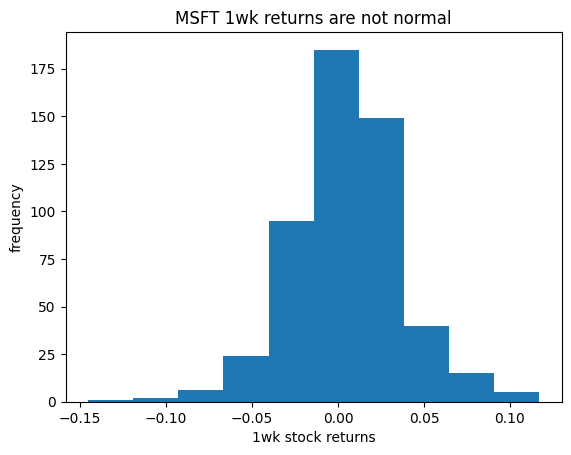

In [12]:
plt.hist(data_clean['return'], bins = 10)
plt.title(ticker_symbol + " " + timeinterval + " returns are not normal")
plt.xlabel(timeinterval + " stock returns")
plt.ylabel("frequency")
plt.show()

In [13]:
import scipy.stats as stats

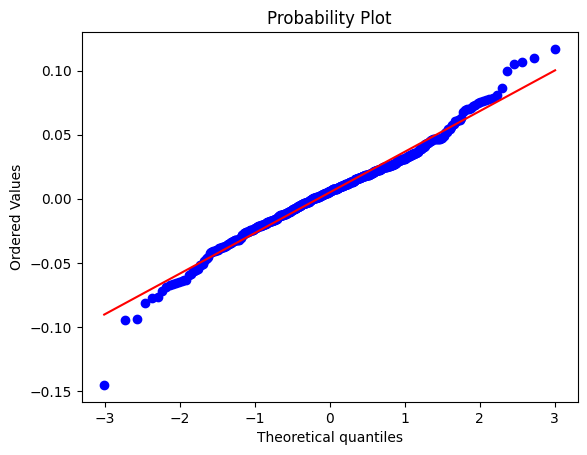

In [14]:
stats.probplot(data_clean['return'], dist="norm", plot=plt)
plt.show()

In [15]:
import statsmodels.api as sm

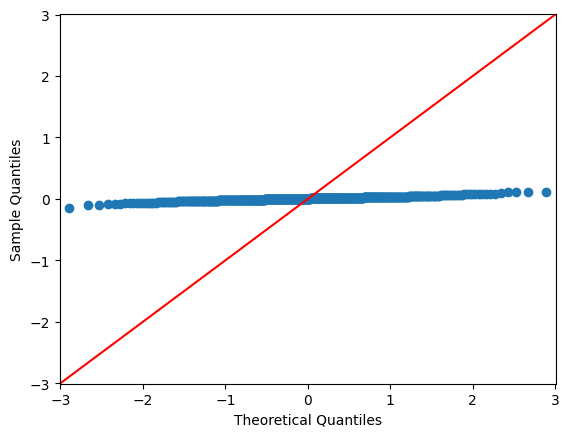

In [18]:
sm.qqplot(data_clean['return'], line='45')
plt.show()